In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
data=pd.read_excel("crime_data.xlsx")

In [3]:
data.head()

,State,Year,Gender,Location,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
0,Delhi,2010,Female Victims,Hauz khas,14,152,2,12,9,74,41
1,Delhi,2011,Female Victims,Vasant vihar,14,130,3,6,2,69,36
2,Delhi,2012,Female Victims,Vasant kunj,23,131,6,8,7,44,43
3,Delhi,2013,Female Victims,Palam,16,125,7,14,7,51,30
4,Delhi,2014,Female Victims,Dwarka,15,158,3,7,3,87,43


In [4]:
data.describe()

,Year,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,2014.384615,15.038462,189.448718,3.000000,5.410256,89.051282,72.256410
std,2.834073,19.976247,242.007118,4.321496,8.356405,111.180665,103.824582
min,2010.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,2.000000,14.250000,0.000000,0.000000,5.250000,5.250000
50%,2014.000000,6.000000,75.500000,1.000000,1.000000,29.000000,24.000000
75%,2017.000000,23.000000,351.500000,5.000000,8.000000,135.250000,99.250000
max,2019.000000,100.000000,831.000000,20.000000,47.000000,367.000000,381.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   State                   78 non-null     object
 1   Year                    78 non-null     int64 
 2   Gender                  78 non-null     object
 3   Location                78 non-null     object
 4   Victims_Above_50_Yrs    78 non-null     int64 
 5   Victims_Total           78 non-null     int64 
 6   Victims_Upto_10_15_Yrs  78 non-null     int64 
 7   Victims_Upto_10_Yrs     78 non-null     object
 8   Victims_Upto_15_18_Yrs  78 non-null     int64 
 9   Victims_Upto_18_30_Yrs  78 non-null     int64 
 10  Victims_Upto_30_50_Yrs  78 non-null     int64 
dtypes: int64(7), object(4)
memory usage: 6.8+ KB


####  dealing with gender class labels 

In [6]:
data["Gender"].value_counts()

 Female Victims    30
 Male Victims      29
Male Victims       11
Female Victims      8
Name: Gender, dtype: int64

In [7]:
data['Gender'] = data['Gender'].replace(["Male Victims"," Male Victims"],"MV")

In [8]:
data["Gender"].value_counts()

MV                 40
 Female Victims    30
Female Victims      8
Name: Gender, dtype: int64

In [9]:
data['Gender'] = data['Gender'].replace(["Female Victims"," Female Victims"],"FV")

In [10]:
data["Gender"].value_counts()

MV    40
FV    38
Name: Gender, dtype: int64

In [11]:
data.duplicated().sum()

0

#### Rearange the columns 

In [12]:
cols = data.columns.tolist()

In [13]:
cols

['State',
 'Year',
 'Gender',
 'Location',
 'Victims_Above_50_Yrs',
 'Victims_Total',
 'Victims_Upto_10_15_Yrs',
 'Victims_Upto_10_Yrs',
 'Victims_Upto_15_18_Yrs',
 'Victims_Upto_18_30_Yrs',
 'Victims_Upto_30_50_Yrs']

In [14]:
index=data.columns.get_loc("Victims_Total")

In [15]:
index

5

In [16]:
new_col= cols[0:index] + cols[index+1:] + cols[index:index+1]

In [17]:
new_col

['State',
 'Year',
 'Gender',
 'Location',
 'Victims_Above_50_Yrs',
 'Victims_Upto_10_15_Yrs',
 'Victims_Upto_10_Yrs',
 'Victims_Upto_15_18_Yrs',
 'Victims_Upto_18_30_Yrs',
 'Victims_Upto_30_50_Yrs',
 'Victims_Total']

In [18]:
data=data[new_col]

In [19]:
data.head()

,State,Year,Gender,Location,Victims_Above_50_Yrs,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs,Victims_Total
0,Delhi,2010,FV,Hauz khas,14,2,12,9,74,41,152
1,Delhi,2011,FV,Vasant vihar,14,3,6,2,69,36,130
2,Delhi,2012,FV,Vasant kunj,23,6,8,7,44,43,131
3,Delhi,2013,FV,Palam,16,7,14,7,51,30,125
4,Delhi,2014,FV,Dwarka,15,3,7,3,87,43,158


In [20]:
data.isnull().sum()

State                     0
Year                      0
Gender                    0
Location                  0
Victims_Above_50_Yrs      0
Victims_Upto_10_15_Yrs    0
Victims_Upto_10_Yrs       0
Victims_Upto_15_18_Yrs    0
Victims_Upto_18_30_Yrs    0
Victims_Upto_30_50_Yrs    0
Victims_Total             0
dtype: int64

#### visulaization

<AxesSubplot:xlabel='Gender', ylabel='count'>

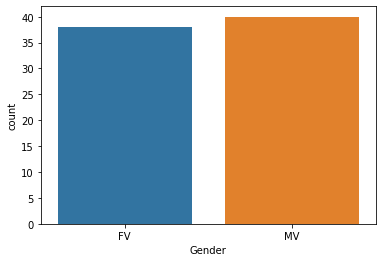

In [21]:
sns.countplot(x ='Gender', data = data)

###### male victims are more tham female victims

<AxesSubplot:xlabel='Victims_Total'>

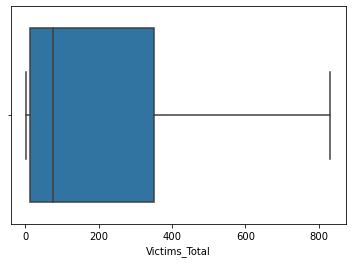

In [22]:
sns.boxplot(x=data['Victims_Total'])


#### victims_total have no outliers

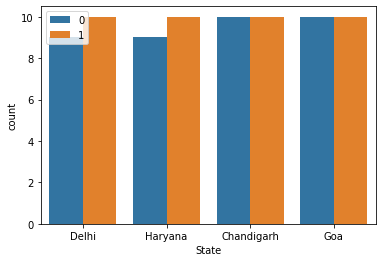

In [23]:
figsize=(15, 6)
ax = sns.countplot(x="State", hue="Gender", data=data)
plt.legend(labels=data.index, loc='upper left')


#### handling categorical features

In [24]:
data["Gender"]=data["Gender"].replace(["FV","MV"],[1,0])

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   State                   78 non-null     object
 1   Year                    78 non-null     int64 
 2   Gender                  78 non-null     int64 
 3   Location                78 non-null     object
 4   Victims_Above_50_Yrs    78 non-null     int64 
 5   Victims_Upto_10_15_Yrs  78 non-null     int64 
 6   Victims_Upto_10_Yrs     78 non-null     object
 7   Victims_Upto_15_18_Yrs  78 non-null     int64 
 8   Victims_Upto_18_30_Yrs  78 non-null     int64 
 9   Victims_Upto_30_50_Yrs  78 non-null     int64 
 10  Victims_Total           78 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 6.8+ KB


In [26]:
data['Victims_Upto_10_Yrs'].value_counts()

0     24
1     11
2     11
4      5
3      3
6      3
14     3
13     2
12     2
10     2
8      2
11     1
7      1
15     1
17     1
18     1
19     1
20     1
21     1
24     1
s      1
Name: Victims_Upto_10_Yrs, dtype: int64

In [27]:
data['Victims_Upto_10_Yrs']=data['Victims_Upto_10_Yrs'].replace(["s"],5)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   State                   78 non-null     object
 1   Year                    78 non-null     int64 
 2   Gender                  78 non-null     int64 
 3   Location                78 non-null     object
 4   Victims_Above_50_Yrs    78 non-null     int64 
 5   Victims_Upto_10_15_Yrs  78 non-null     int64 
 6   Victims_Upto_10_Yrs     78 non-null     int64 
 7   Victims_Upto_15_18_Yrs  78 non-null     int64 
 8   Victims_Upto_18_30_Yrs  78 non-null     int64 
 9   Victims_Upto_30_50_Yrs  78 non-null     int64 
 10  Victims_Total           78 non-null     int64 
dtypes: int64(9), object(2)
memory usage: 6.8+ KB


In [29]:
data.drop(["Location"],axis=1,inplace=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   State                   78 non-null     object
 1   Year                    78 non-null     int64 
 2   Gender                  78 non-null     int64 
 3   Victims_Above_50_Yrs    78 non-null     int64 
 4   Victims_Upto_10_15_Yrs  78 non-null     int64 
 5   Victims_Upto_10_Yrs     78 non-null     int64 
 6   Victims_Upto_15_18_Yrs  78 non-null     int64 
 7   Victims_Upto_18_30_Yrs  78 non-null     int64 
 8   Victims_Upto_30_50_Yrs  78 non-null     int64 
 9   Victims_Total           78 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 6.2+ KB


In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le=LabelEncoder()

In [33]:
data.iloc[:,0]=le.fit_transform(data.iloc[:,0])

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   State                   78 non-null     int32
 1   Year                    78 non-null     int64
 2   Gender                  78 non-null     int64
 3   Victims_Above_50_Yrs    78 non-null     int64
 4   Victims_Upto_10_15_Yrs  78 non-null     int64
 5   Victims_Upto_10_Yrs     78 non-null     int64
 6   Victims_Upto_15_18_Yrs  78 non-null     int64
 7   Victims_Upto_18_30_Yrs  78 non-null     int64
 8   Victims_Upto_30_50_Yrs  78 non-null     int64
 9   Victims_Total           78 non-null     int64
dtypes: int32(1), int64(9)
memory usage: 5.9 KB


#### Splitting dataset

In [35]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [36]:
from sklearn.model_selection import train_test_split 

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

### Built model

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
regressor=LinearRegression()

In [40]:
### training the model

In [41]:
regressor.fit(x_train,y_train)

LinearRegression()

In [42]:
y_pred=regressor.predict(x_test)

In [43]:
y_pred

array([677.87815454,  10.84514892, 458.04377302, 143.10318614,
        32.96508693,  25.04298966, 474.13450322,   5.79391032,
        21.95170063, 360.43652999, 155.96479723,   7.90499308,
       129.77353831,  18.9019433 , 385.06652447,   9.97676869])

In [45]:
pd.DataFrame({"actual":y_test,"predicted":y_pred}).head()

,actual,predicted
28,675,677.878155
65,11,10.845149
27,458,458.043773
13,143,143.103186
75,33,32.965087


### Model Performance

In [46]:
from sklearn import metrics

In [47]:
metrics.mean_absolute_error(y_test,y_pred)

0.3517358519909869

In [49]:
metrics.r2_score(y_test,y_pred)

0.9999858418441627